If the data is not split

In [ ]:
from data_splitter import DataSplitter

# # Split rviz selected data
ground_truth_name = "pass1_part2.yaml"
test_alg_name = "pass1_fast_file"

splitter = DataSplitter("../data", ground_truth_name)
algorithm_splitter = DataSplitter("../data", test_alg_name)

splitter.split_rviz_selection_data()
algorithm_splitter.split_node_data()


Load data

In [2]:
import numpy as np
from data_loader import DataLoader
from feature import get_features_from_loader
tp_loader = DataLoader("../data", "fall_corrected")
tp_features = get_features_from_loader(tp_loader)

alg_loader = DataLoader("../data", "pass2_alg")
alg_features = get_features_from_loader(alg_loader)

Plat Data at timestamp Group data


Found dict_keys([]) timestamps


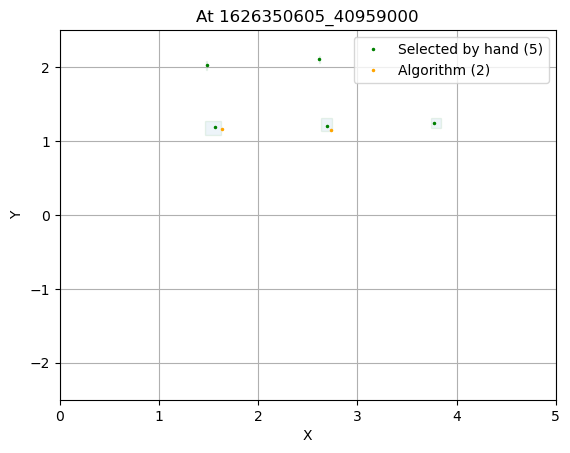

In [5]:
from collections import defaultdict
import matplotlib.pyplot as plt
from feature import group_features_by_timestamp
from plot_utils import plot_feature, plot_feature_with_bbox
 

timestamp = "1626350605_40959000"

# return timestamp_dict
grouped_features = group_features_by_timestamp(tp_features, alg_features)
alg_true = []
alg_false = []
tp_true = []

grouped_features = dict(sorted(grouped_features.items()))
features_at_timestamp = grouped_features[timestamp]

selected_features_at_this_time = features_at_timestamp["tp"]
algorithm_features_at_this_time = features_at_timestamp["alg"]


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title(f"At {timestamp}")
ax.grid()
# Set plot limits
ax.set_xlim(0, 5)
ax.set_ylim(-2.5, 2.5)

# Set labels
ax.set_xlabel("X")
ax.set_ylabel("Y")

plot_feature_with_bbox(ax, selected_features_at_this_time, f"Selected by hand ({len(selected_features_at_this_time)})", "g", "g")
plot_feature(ax, algorithm_features_at_this_time, f"Algorithm ({len(algorithm_features_at_this_time)})", "orange")
ax.legend()

